<a href="https://colab.research.google.com/github/alevant/mlcourse-Nov22/blob/main/Multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

# TASK #2: IMPORT LIBRARIES AND DATASET

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [1]:
!git clone https://github.com/alevant/mlcourse-Nov22 mlcourse

Cloning into 'mlcourse'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 95 (delta 21), reused 2 (delta 2), pack-reused 53
Unpacking objects: 100% (95/95), done.


In [6]:
# read the csv file d
admission_df = pd.read_csv('./mlcourse/data/admission_data.csv')
admission_df


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
admission_df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
# Let's drop the serial no.
admission_df.drop('Serial No.',axis=1,inplace=True)
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [8]:
# checking the null values
admission_df.isnull().sum()


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
# Check the dataframe information
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [10]:
# Statistical summary of the dataframe
admission_df.describe()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# TASK #4: PERFORM DATA VISUALIZATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000257810AD488>,
      dtype=object)

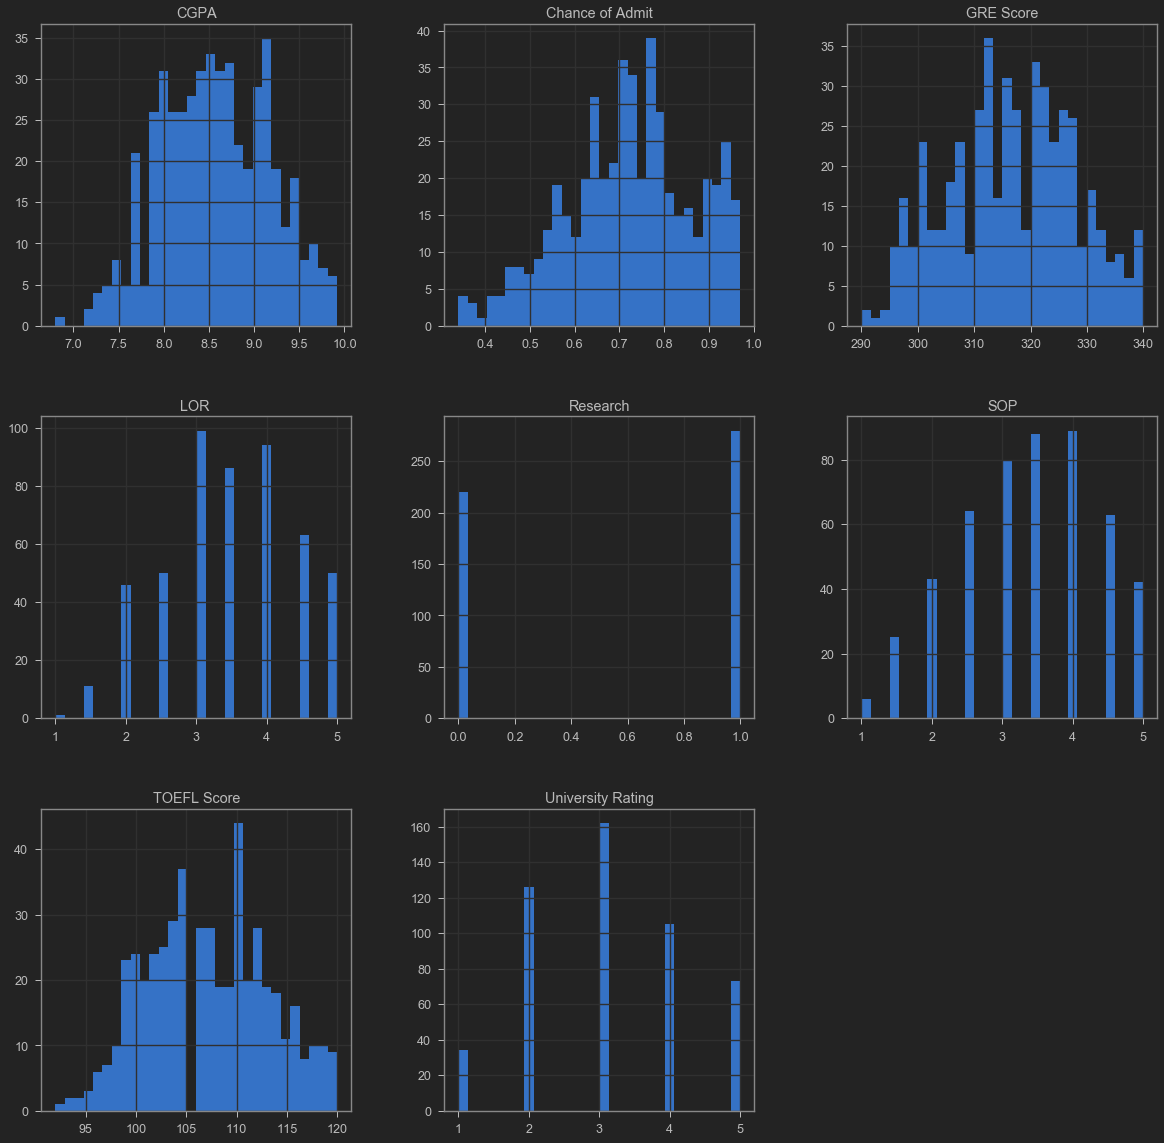

In [ ]:
admission_df.hist(bins=30,figsize=(20,20))

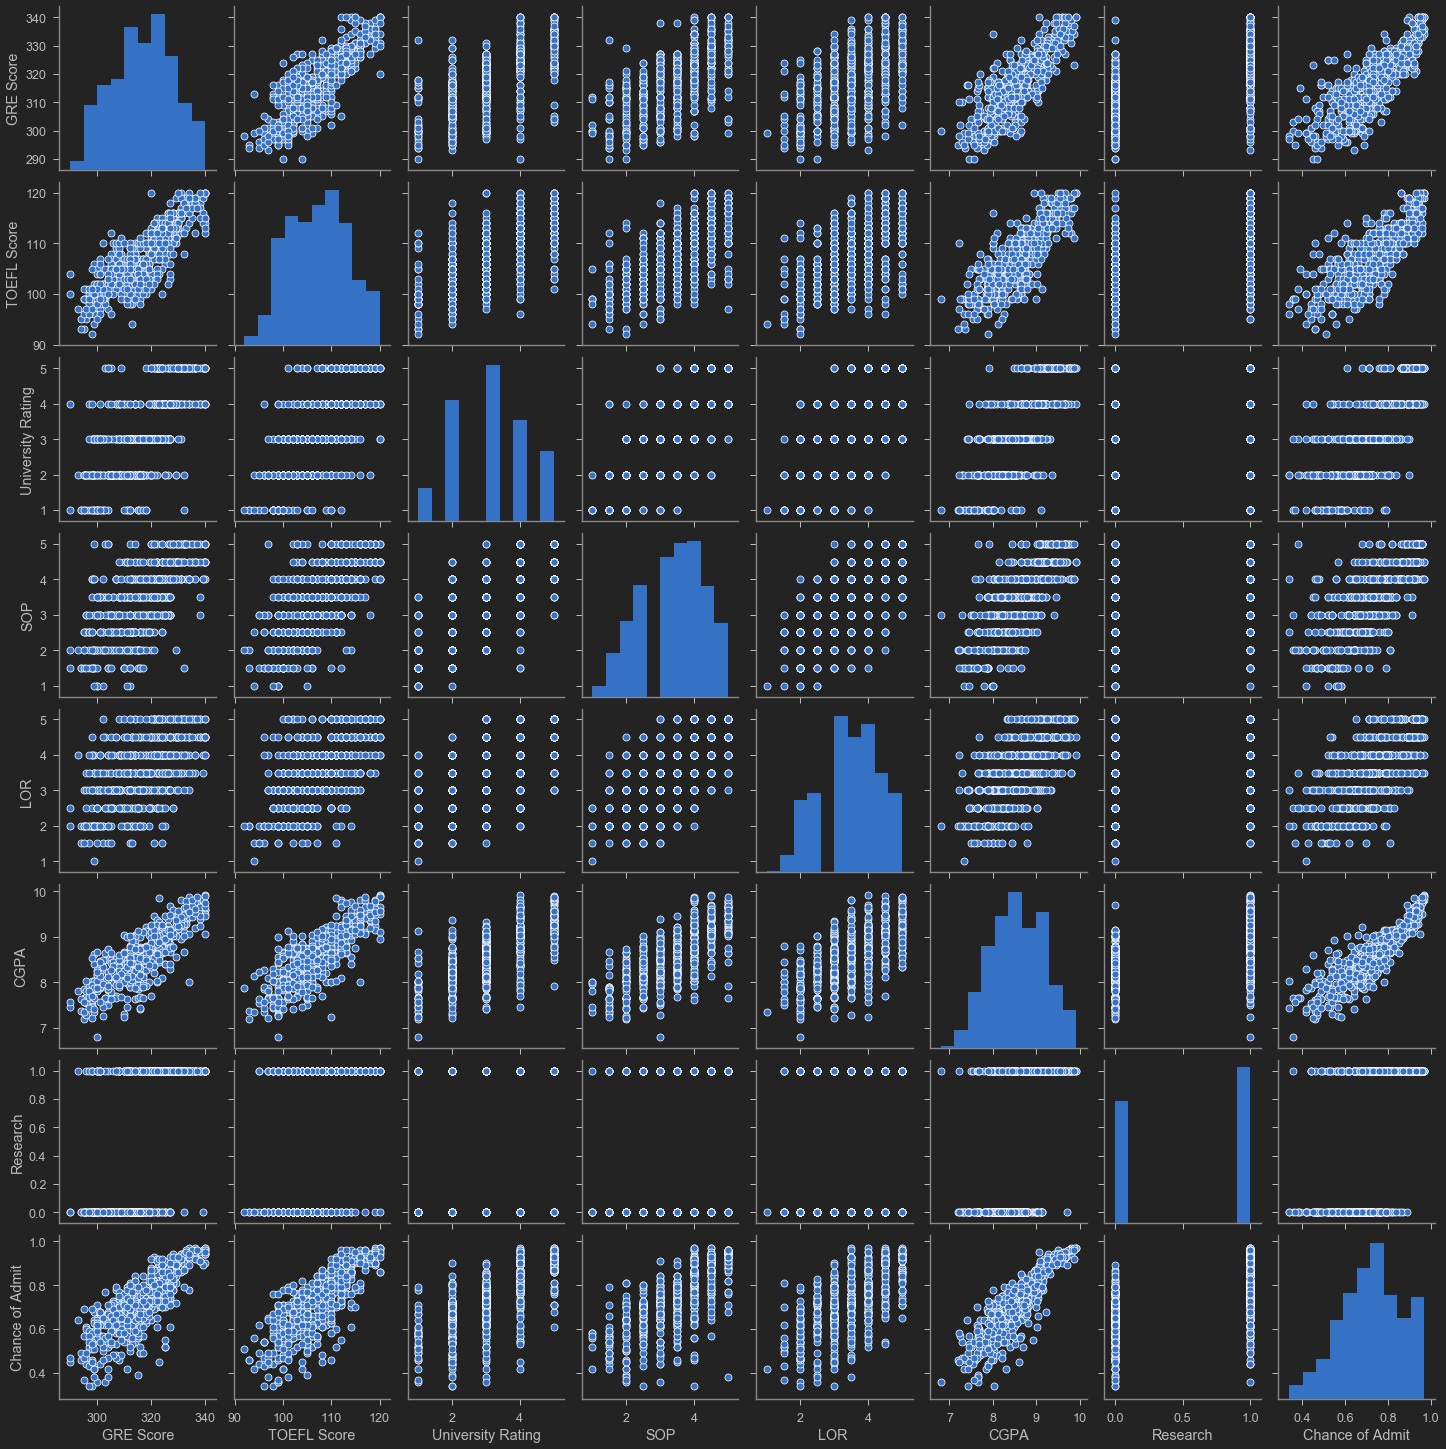

In [ ]:
sns.pairplot(admission_df)

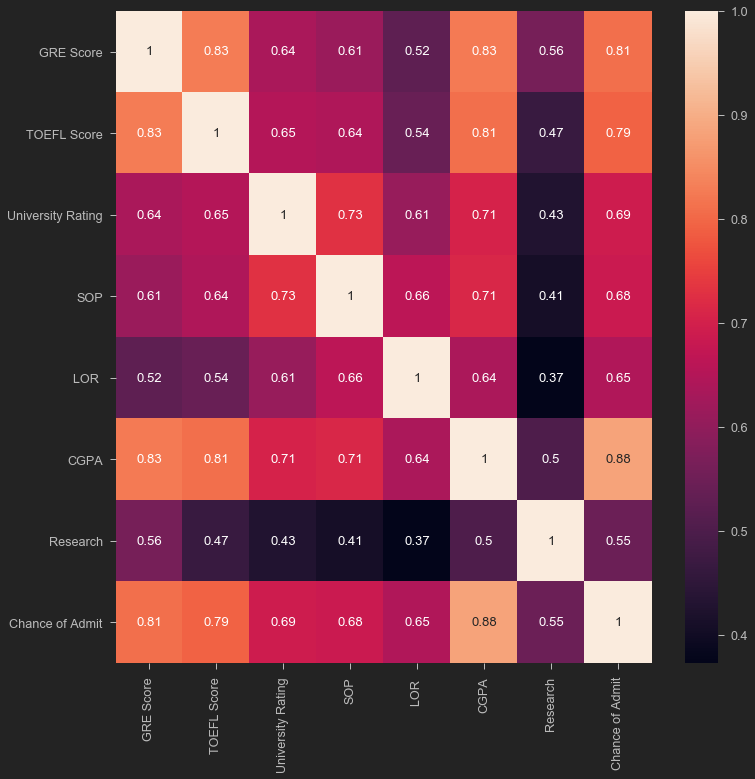

In [ ]:
corr_matrix=admission_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix,annot=True)
plt.show()
  

# TASK #5: CREATE TRAINING AND TESTING DATASET

In [ ]:
admission_df.columns

In [12]:
X=admission_df.drop(columns=['Chance of Admit'])

In [13]:
y=admission_df['Chance of Admit']

In [14]:
X.shape

(500, 7)

In [15]:
y.shape

(500,)

In [17]:
print(y)

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64


In [18]:
X=np.array(X)
y=np.array(y)

In [19]:
# scaling the data before training the mod
y=y.reshape(-1,1)
y.shape


(500, 1)

In [20]:
# spliting the data in to test and train sets
from  sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler_x=StandardScaler()
X=scaler_x.fit_transform(X)

In [21]:
scaler_y=StandardScaler()
y=scaler_y.fit_transform(y)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

# TASK #6: TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score

In [27]:
LinearRegression_model=LinearRegression()
LinearRegression_model.fit(X_train,y_train)
y_predict=LinearRegression_model.predict(X_train)

In [43]:
print(f'coef={LinearRegression_model.coef_}')
print(f'intersept={LinearRegression_model.intercept_}')
MSE_train=mean_squared_error(y_train, y_predict)
R2_train=LinearRegression_model.score(X_train,y_train)
print("MSE: {:.4f}".format(MSE_train))
print("R^2: {:.4f}".format(R2_train))
k = X_train.shape[1]
n = len(X_train)
adj_r2 = 1-(1-R2_train)*(n-1)/(n-k-1)
print("R_adj^2: {:.4f}".format(adj_r2))

coef=[[ 1.59708481e-01  9.92602040e-02  6.83079101e-02 -4.83601301e-04
   1.07801303e-01  5.27347860e-01  7.93054583e-02]]
intersept=[-0.00464743]
MSE: 0.1823
R^2: 0.8159
R_adj^2: 0.8128


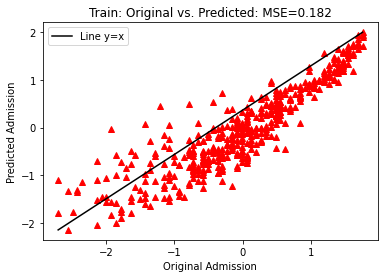

In [41]:
plt.plot(y_train,y_predict,'^',color='r')
plt.plot([y_train.min(), y_train.max()], [y_predict.min(), y_predict.max()], 'k', label='Line y=x')
plt.xlabel('Original Admission')
plt.ylabel('Predicted Admission')
plt.title(f'Train: Original vs. Predicted: MSE={np.round(MSE_train, 3)}')
plt.legend()

In [39]:
y_predict_test = LinearRegression_model.predict(X_test)
MSE_test=mean_squared_error(y_test, y_predict_test)
R2_test=LinearRegression_model.score(X_test,y_test)
print("MSE: {:.4f}".format(MSE_test))
print("R^2: {:.4f}".format(R2_test))


MSE: 0.1574
R^2: 0.8469


R_adj^2: 0.8309


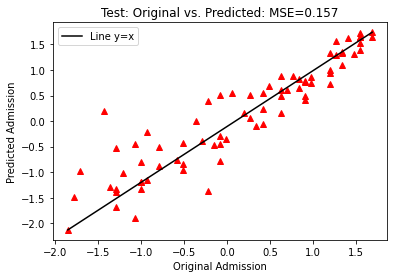

In [44]:
plt.plot(y_test,y_predict_test,'^',color='r')
plt.plot([y_test.min(), y_test.max()], [y_predict_test.min(), y_predict_test.max()], 'k', label='Line y=x')
plt.xlabel('Original Admission')
plt.ylabel('Predicted Admission')
plt.title(f'Test: Original vs. Predicted: MSE={np.round(MSE_test, 3)}')
plt.legend()
k = X_test.shape[1]
n = len(X_test)
adj_r2 = 1-(1-R2_test)*(n-1)/(n-k-1)
print("R_adj^2: {:.4f}".format(adj_r2))

R_adj^2: 0.8309


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.058 
MSE = 0.0033834784568921293 
MAE = 0.04191825148522679 
R2 = 0.8683261012566938 
Adjusted R2 = 0.8545691267611245
